# Support Vector Machines

Let's create the same fake income / age clustered data that we used for our K-Means clustering example:

In [10]:
import numpy as np

#Create fake income/age clusters for N people in k clusters
def createClusteredData(N, k):
    np.random.seed(1234)
    pointsPerCluster = float(N)/k
    X = []
    y = []
    for i in range (k):
        incomeCentroid = np.random.uniform(20000.0, 200000.0)
        ageCentroid = np.random.uniform(20.0, 70.0)
        for j in range(int(pointsPerCluster)):
            X.append([np.random.normal(incomeCentroid, 10000.0), np.random.normal(ageCentroid, 2.0)])
            y.append(i)
    X = np.array(X)
    y = np.array(y)
    return X, y

C:\Users\Einat Willmott\AppData\Local\Temp\ipykernel_19960\3315743124.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))


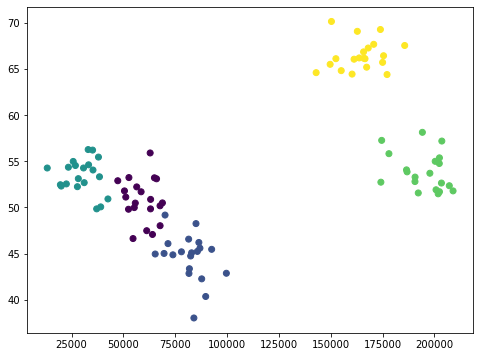

C:\Users\Einat Willmott\AppData\Local\Temp\ipykernel_19960\3315743124.py:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))


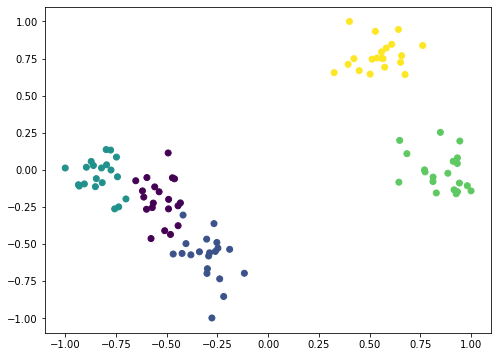

In [11]:
%matplotlib inline
from pylab import *
from sklearn.preprocessing import MinMaxScaler

(X, y) = createClusteredData(100, 5)

plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
plt.show()

scaling = MinMaxScaler(feature_range=(-1,1)).fit(X)
X = scaling.transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
plt.show()

Now we'll use linear SVC to partition our graph into clusters:

In [19]:
from sklearn import svm

# I have tried all of the kernels below, with various values of the hyperparameters.

# The best kernel I have found is the one below, a "poly" kernel with the below hyperparameter
# values.

# Please note I did not use `GridSearchCV` here, but did a manual tuning.

# C = 1.0
# svc = svm.SVC(kernel = "linear", coef0 = 3).fit(X, y)
# svc = svm.SVC(kernel = "sigmoid", gamma = 1, coef0 = 3).fit(X, y) # This kernel takes a long time to run
# svc = svm.SVC(kernel = "rbf", coef0 = 3, gamma = 10).fit(X, y) # This kernel takes a long time to run
svc = svm.SVC(kernel = "poly", degree = 10, coef0 = 10, C = 2.0).fit(X, y)

By setting up a dense mesh of points in the grid and classifying all of them, we can render the regions of each cluster as distinct colors:

C:\Users\Einat Willmott\AppData\Local\Temp\ipykernel_19960\1826441922.py:19: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:,0], X[:,1], c=y.astype(np.float)) # Draw the points


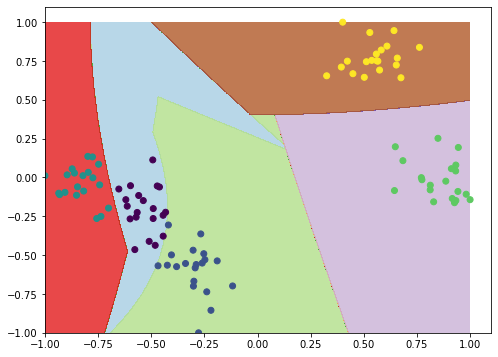

In [13]:
def plotPredictions(clf):
    # Create a dense grid of points to sample 
    xx, yy = np.meshgrid(np.arange(-1, 1, .001),
                     np.arange(-1, 1, .001))
    
    # Convert to Numpy arrays
    npx = xx.ravel()
    npy = yy.ravel()
    
    # Convert to a list of 2D (income, age) points
    samplePoints = np.c_[npx, npy]
    
    # Generate predicted labels (cluster numbers) for each point
    Z = clf.predict(samplePoints)

    plt.figure(figsize=(8, 6))
    Z = Z.reshape(xx.shape) #Reshape results to match xx dimension
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8) # Draw the contour
    plt.scatter(X[:,0], X[:,1], c=y.astype(np.float)) # Draw the points
    plt.show()
    
plotPredictions(svc)

In [14]:
xx, yy = np.meshgrid(np.arange(-1, 1, .001),
                     np.arange(-1, 1, .001))
type(xx)
shape(xx)

(2000, 2000)

In [15]:
xx[0,1:3]

array([-0.999, -0.998])

In [16]:
npx = xx.ravel()
npx.shape

(4000000,)

Or just use predict for a given point:

In [17]:
print(svc.predict(scaling.transform([[200000, 40]])))

[3]


In [18]:
print(svc.predict(scaling.transform([[50000, 65]])))

[0]


## Activity

"Linear" is one of many kernels scikit-learn supports on SVC. Look up the documentation for scikit-learn online to find out what the other possible kernel options are. Do any of them work well for this data set?

**[scikit-learn Documentation for SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)**
  
**[scikit-learn Documentation for the different kernels](https://scikit-learn.org/stable/modules/svm.html#svm-kernels)**

**<u>Done.</u>**